# 0. Import Libraries

In [1]:
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
import matplotlib.pyplot as plt
import shapely.geometry

# 1. Load Data

## Map

In [2]:
bello_map=gpd.read_file('/Users/rafaelmateus/Desktop/Modelo_PI/data/maps/BELLO_MAPA/bello_map.shp')
veredas_map=gpd.read_file('/Users/rafaelmateus/Desktop/Modelo_PI/data/maps/BELLO_VEREDAS/bello_veredas.shp')

## Data

# 2. Define grid

In [3]:
# Create square grid
xmin, ymin, xmax, ymax = bello_map.total_bounds

n_cells=30
cell_size = (xmax-xmin)/n_cells


grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'])

In [4]:
# Check if grid cell inside grid
in_shape=[]
for i in range(len(cell)):
    small=cell.iloc[i].values
    big = bello_map.geometry.values
    in_shape.append(big.contains(small)[0])

/opt/anaconda3/envs/pi_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
# Add new column with boolean
cell['in_map']=in_shape

In [6]:
# Only use grid cells that are within the map
grid = cell[cell.in_map==True] 
grid

,geometry,in_map
75,"POLYGON ((-75.66360 6.36403, -75.66360 6.36916...",True
76,"POLYGON ((-75.66360 6.36916, -75.66360 6.37428...",True
77,"POLYGON ((-75.66360 6.37428, -75.66360 6.37941...",True
104,"POLYGON ((-75.65847 6.35891, -75.65847 6.36403...",True
105,"POLYGON ((-75.65847 6.36403, -75.65847 6.36916...",True
...,...,...
855,"POLYGON ((-75.53037 6.36403, -75.53037 6.36916...",True
881,"POLYGON ((-75.52525 6.34354, -75.52525 6.34866...",True
882,"POLYGON ((-75.52525 6.34866, -75.52525 6.35379...",True
883,"POLYGON ((-75.52525 6.35379, -75.52525 6.35891...",True


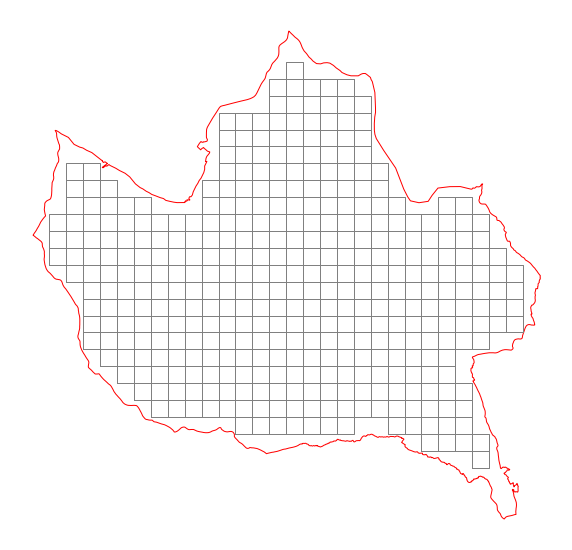

In [7]:
# Plot grid and map
ax = bello_map.plot(color='white', edgecolor='red', markersize=.1,  figsize=(10, 10))
plt.autoscale(False)
grid.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")
plt.show()

In [9]:
# Delete in_map column as it is not necesarry anymore
del grid['in_map']

# 3. Load data into grid

# 4. Create Classes

## 4.1. Simulation Builder

In [11]:
class SimulationBuilder:
    
    # Define constants
    naturalEmergenceRate=0.3
    deathRate=0.071428571428571
    mosquitoCarryingCapacity=1000
    mosquitoBiteDemand=0.5
    maxBitesPerHuman=19
    probabilityOfTransmissionHToM=0.333

## 4.2. Humans & Patches

In [13]:
# Poner type annotations

class Human:
    
    # Define constants
    naturalEmergenceRate = SimulationBuilder.naturalEmergenceRate
    deathRate = SimulationBuilder.deathRate
    mosquitoCarryingCapacity = SimulationBuilder.mosquitoCarryingCapacity
    mosquitoBiteDemand = SimulationBuilder.mosquitoBiteDemand
    maxBitesPerHuman = SimulationBuilder.maxBitesPerHuman
    probabilityOfTransmissionHToM = SimulationBuilder.probabilityOfTransmissionHToM

    # Constructor
    def __init__(self, grid, infectionState, age, timeSinceSuccesfullBite, timeSinceInfection, homeLocation):
        self.grid = grid
        self.infectionState = infectionState
        self.age = age
        self.timeSinceSuccesfullBite = timeSinceSuccesfullBite
        self.timeSinceInfection = timeSinceInfection
        self.homeLocation = homeLocation
        
    def calculateInfectionProbabilityHuman():
        
        
    
        

In [12]:
class MyPatch:
    
    # Define constants
    naturalEmergenceRate = SimulationBuilder.naturalEmergenceRate
    deathRate = SimulationBuilder.deathRate
    mosquitoCarryingCapacity = SimulationBuilder.mosquitoCarryingCapacity
    mosquitoBiteDemand = SimulationBuilder.mosquitoBiteDemand
    maxBitesPerHuman = SimulationBuilder.maxBitesPerHuman
    probabilityOfTransmissionHToM = SimulationBuilder.probabilityOfTransmissionHToM
    
    # Constructor
    def __init__(self, suceptibleMosquitoes: float, exposedMosquitoes: float, infectedMosquitoes: float, temperaturePatch: int, patchType: int):
        self.suceptibleMosquitoes = suceptibleMosquitoes
        self.exposedMosquitoes = exposedMosquitoes
        self.infectedMosquitoes = infectedMosquitoes
        self.temperaturePatch = temperaturePatch
        self.patchType = patchType
        
    def recalculateSEIR(x, y):
        timeStep=0.1
        solveRK4(timeStep, x, y)
        
    def solveRK4(h, x, y):
        niter = 1/h
        s0 = self.suceptibleMosquitoes
        e0 = self.exposedMosquitoes
        i0 = self.infectedMosquitoes
        
        birthRate = calculateBirthRate()
        infectionRate = calculateInfectionRate(x,y)
        
        i=1
        while(i<=niter):
            k1i = h*infected_function(s0,e0,i0)
            k1e = h*exposed_function(s0,e0,i0,infectionRate)
            k1s = h*suceptible_function(s0,e0,i0,birthRate,infectionRate)
            
            k2i = h*infected_function(s0+k1s/2,e0+k1e/2,i0+k1i/2)
            k2e = h*exposed_function(s0+k1s/2,e0+k1e/2,i0+k1i/2,infectionRate)
            k2s = h*suceptible_function(s0+k1s/2,e0+k1e/2,i0+k1i/2,birthRate,infectionRate)
            
            k3i = h*infected_function(s0+k2s/2,e0+k2e/2,i0+k2i/2)
            k3e = h*exposed_function(s0+k2s/2,e0+k2e/2,i0+k2i/2,infectionRate)
            k3s = h*suceptible_function(s0+k2s/2,e0+k2e/2,i0+k2i/2,birthRate,infectionRate)
            
            k4i = h*infected_function(s0+k3s,e0+k3e,i0+k3i)
            k4e = h*exposed_function(s0+k3s,e0+k3e,i0+k3i,infectionRate)
            k4s = h*suceptible_function(s0+k3s,e0+k3e,i0+k3i,birthRate,infectionRate)
            
            i0 = i0+(k1i+2*k2i+2*k3i+k4i)/6
            self.infectedMosquitoes = i0
            
            e0 = e0+(k1e+2*k2e+2*k3e+k4e)/6
            self.exposedMosquitoes = e0

            s0 = s0+(k1s+2*k2s+2*k3s+k4s)/6
            self.suceptibleMosquitoes = s0
            
            birthRate = calculateBirthRate()
            infectionRate = calculateInfectionRate(x,y)
            i=i+1
            
    def suceptible_function(suceptible, exposed, infected, birthRate, infectionRate):
        s1 = birthRate-infectionRate*suceptible-deathRate*suceptible
        return s1
    
    def exposed_function(suceptible, exposed, infected, infectionRate): 
        exposedToinfectedRate = calculateExposedToinfectedRate()
        e1 = infectionRate*suceptible-exposedToinfectedRate*exposed-deathRate*exposed
        return e1
    
    def infected_function(suceptible, exposed, infected):
        exposedToinfectedRate = calculateExposedToinfectedRate()
        i1 = exposedToinfectedRate*exposed-deathRate*infected
        return i1
    
    def calculateBirthRate():
        totalMosquitoes = self.suceptibleMosquitoes+self.infectedMosquitoes+self.exposedMosquitoes
        mosquitoPopulationGrowthRate = naturalEmergenceRate-deathRate
        birthRate = totalMosquitoes*(naturalEmergenceRate-mosquitoPopulationGrowthRate*totalMosquitoes/mosquitoCarryingCapacity)
        return birthRate

    def calculateInfectionRate(x, y):
        totalHumans = calculateTotalHumansInPatch(x, y)
        humansInfected = calculateInfectedHumansInPatch(x, y)
        totalMosquitoes = self.suceptibleMosquitoes+self.infectedMosquitoes+self.exposedMosquitoes
        
        totalSuccesfulBites = (mosquitoBiteDemand*totalMosquitoes*maxBitesPerHuman*totalHumans)/(mosquitoBiteDemand*totalMosquitoes+maxBitesPerHuman*totalHumans)
        successfulBitesPerMosquito = totalSuccesfulBites/totalMosquitoes
        infectionRateMosquitoes = successfulBitesPerMosquito*probabilityOfTransmissionHToM*(humansInfected/totalHumans)
        return infectionRateMosquitoes
    
    def calculateExposedToinfectedRate():
        patchIncubationPeriod = 7+(0.667-0.378*(self.temperaturePatch-26))/(0.299+0.027*(self.temperaturePatch-26))
        exposedToInfectedRate = 1/patchIncubationPeriod
        return exposedToinfectedRate
